# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [2]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [3]:
set(y)

{np.int64(0), np.int64(1), np.int64(2)}

In [4]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

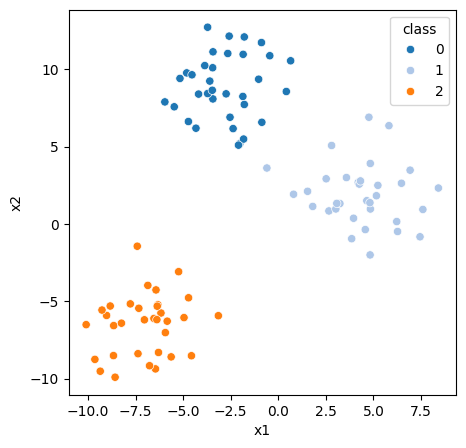

In [6]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [25]:
k = 3

# Step 1
idx = np.random.randint(len(X)-1,size = k)# YOUR CODE HERE
centroids = X[idx, :]
idx
centroids

array([[-3.710475  ,  8.43089863],
       [-2.37414121,  6.16478976],
       [ 0.80233641,  1.92014193]])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [31]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(centroids,X,'euclidean')
print(distances.shape)
distances[0:5]

(3, 100)


array([[18.97439356, 13.38301163,  1.68900381, 14.49928128, 14.40000786,
         9.90862086,  3.14600441,  9.776089  ,  9.66659203,  1.73008933,
         0.8130551 , 12.9835983 , 14.8697008 ,  2.07255617,  2.83381677,
        15.29756806, 13.9048955 ,  2.79789938, 15.7949172 , 15.61565939,
         0.44325222, 15.00145597, 14.19199266,  4.13445185,  3.88072256,
         2.71212427,  9.151055  , 17.13299911, 14.65946613, 18.81795785,
        15.5219926 , 10.73319898,  9.88574904, 16.9737675 ,  4.84706333,
         0.        ,  2.63078646,  1.85885278, 11.71744895, 13.47856589,
        18.17913134,  0.32247162, 12.08003837,  1.75272489,  0.97016337,
         8.31420558, 16.24846394, 14.81184005, 12.79598027, 10.05029222,
         5.73160852, 10.85731544,  4.34175986, 14.00032944, 11.61794894,
        14.34621581,  1.46569737,  3.65487025, 13.56439895,  2.31276854,
        16.93782314,  9.94212667, 17.21209935,  7.92183183, 10.54081466,
        18.01225659,  8.6081011 , 17.65041546,  9.0

## Step 3
Now assign each data point to the closest centroid

In [32]:
# Step 3
points = np.argmin(distances, axis=0)
points

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0])

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [33]:
# Step 4
temp_centroids = []

for cluster in range(k):
    # Update
    temp_cluster_centroid = X[points == cluster].mean(axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[-3.14782921,  9.73049638],
       [-1.93357967,  6.4315099 ],
       [-1.33232543, -2.28382661]])

# Step 5
Centroid change? Convergence

In [34]:
centroids, temp_centroids

(array([[-3.710475  ,  8.43089863],
        [-2.37414121,  6.16478976],
        [ 0.80233641,  1.92014193]]),
 array([[-3.14782921,  9.73049638],
        [-1.93357967,  6.4315099 ],
        [-1.33232543, -2.28382661]]))

In [35]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [43]:
def kmeans(X, k):

    # Step 1
    idx = np.random.randint(len(X)-1,size = k)#
    centroids = X[idx, :]

    
    while True:
        # Step 2
        distances = cdist(centroids,X,'euclidean')

        # Step 3
        points = np.argmin(distances, axis=0)

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            # Update
            temp_cluster_centroid = X[points == cluster].mean(axis=0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [47]:
k = 3
points, centroids = kmeans(X, k)

In [45]:
centroids

array([[-7.02379204, -6.47232379],
       [ 0.71274196,  5.43283772]])

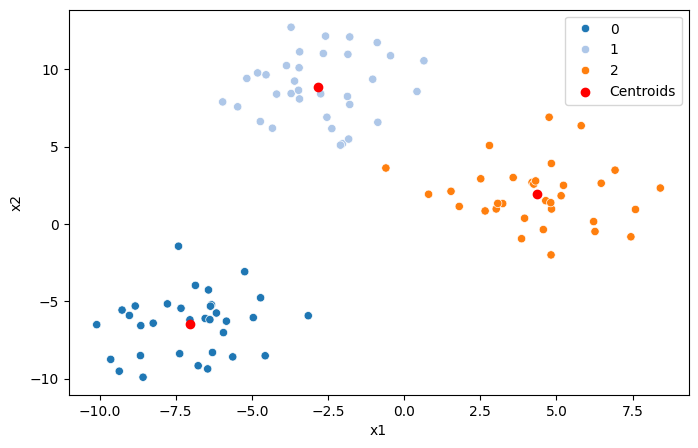

In [48]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [49]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [50]:
print("Points: ", kmeans.labels_)
# print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [51]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.7735151752468
Score:  -2361.773515175247


In [52]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

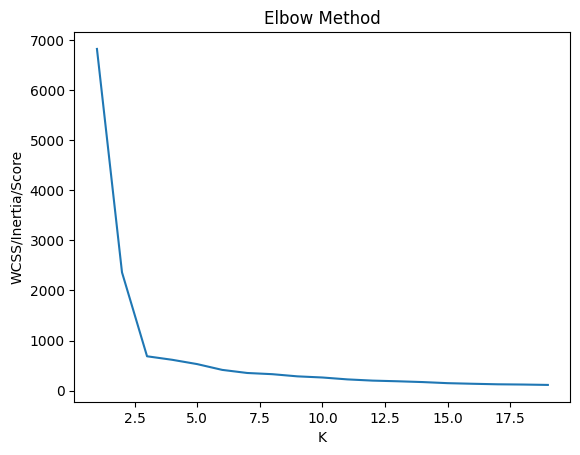

In [53]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()